# Creating final project for IS685

#### I started my dataset about black friday as can be seen in the first project file, but the data was not that good to work on. 

### I found this new data set ono the UC Irvine Machine Learning Repository! http://archive.ics.uci.edu/ml/datasets/Adult  , they have top 10 datasets, first one was the iris we used in class, this was the second one. 

### I will follow there hypothsis as it sounds interesting which will be: Predict whether income exceed 50K/yr based on census data. Also known as "Census Income" dataset. I mentioned below that I added two colums, these will help me in my goal 

#### This is an older dataset, but I would like to see if I can complete the project using this set rather than the blackfriday one 

### I modified the original file (adult.csv) to change certain columns to numbers to be able to do forest and knn (with that in mind, i kept the missing columns in order to delete which I'll talk about in the cleaning part).

### Modifed data are in Adult2.csv. 

### Adult3.csv has the final data with only numbers where needed for the ML algorithm to work
#### The new file created a new file called "Adlut2.csv", after improting the libraries below, I added a picture that shows the changes 

In [1]:
%matplotlib inline
from pandas.plotting import scatter_matrix
from scipy import stats
from scipy.stats import norm
from sklearn import datasets
from sklearn import linear_model
from sklearn import model_selection
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numba
import numpy as np
import os
import pandas as pd
import pip 
import seaborn as sns

C:\Users\Majadly\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


##### Below are the changes I made to the file so I can be able to read them

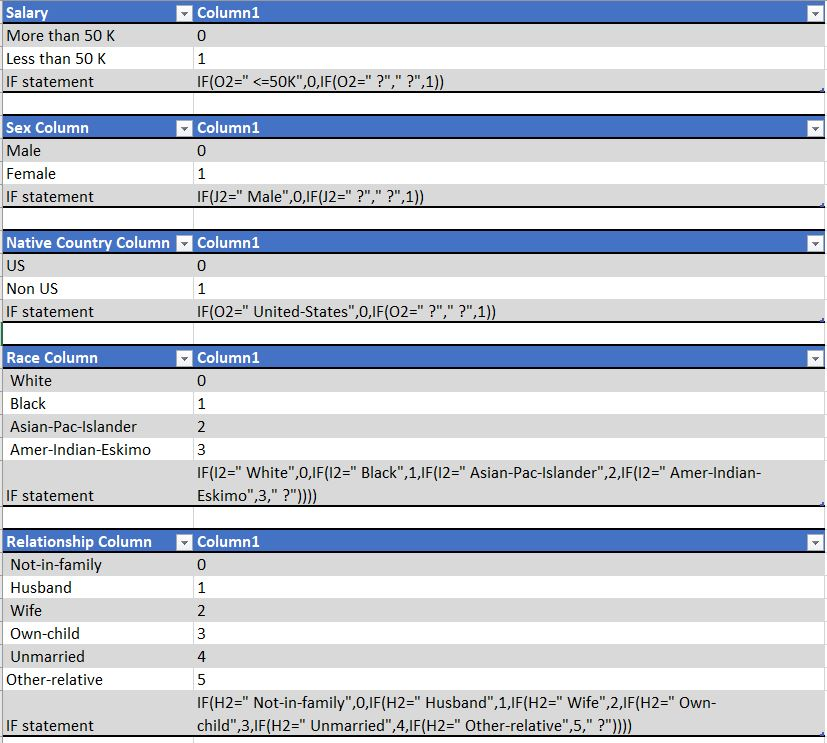

In [2]:
from IPython.core.display import Image 
Image(filename=("/Users\Majadly\Documents\GitHub\FinalProject\Changes1.JPG"))

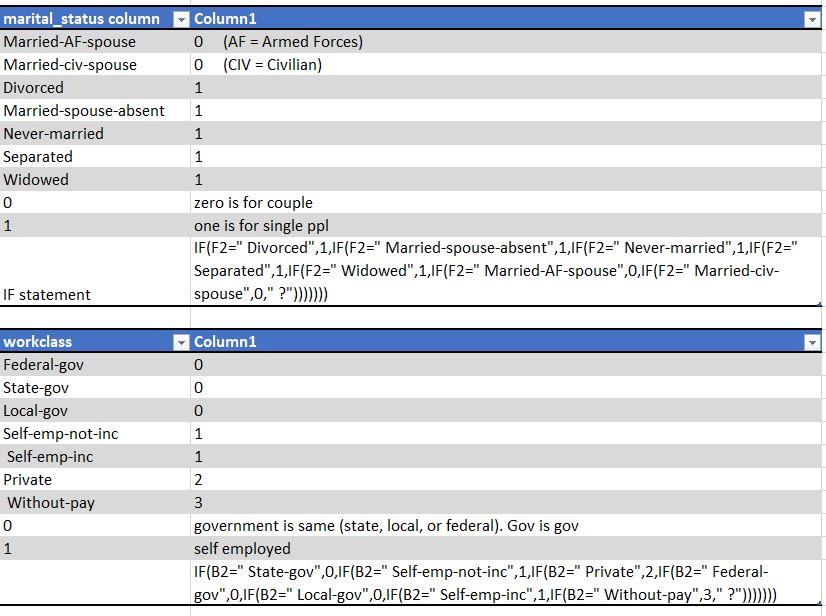

In [3]:
Image(filename=("/Users\Majadly\Documents\GitHub\FinalProject\Changes2.JPG"))

In [4]:
#Reset
pd.reset_option('display.max_columns')

# Load Data
df = pd.read_csv("/Users\Majadly\Documents\GitHub\FinalProject\Adult3.csv")
data = [df]
df.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,0,77516,Bachelors,13,1,Adm-clerical,0,0,0,2174,0,40,0,0
1,50,1,83311,Bachelors,13,0,Exec-managerial,1,0,0,0,0,13,0,0
2,38,2,215646,HS-grad,9,1,Handlers-cleaners,0,0,0,0,0,40,0,0
3,53,2,234721,11th,7,0,Handlers-cleaners,1,1,0,0,0,40,0,0
4,28,2,338409,Bachelors,13,0,Prof-specialty,2,1,1,0,0,40,1,0


In [5]:
df.shape

(48842, 15)

In [6]:
# Missing data
# Found this function on finding missing values on kaggle
# https://www.kaggle.com/dk1304/fa-03-question-10

def nullvalues(data):
    overallnull = data.isnull().sum().sort_values (ascending = False)
    nullpercentage = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    nulldata = pd.concat([overallnull, nullpercentage], axis =1, keys = ['overallnull', 'nullpercentage'])
    return nulldata

print (nullvalues(df))

                overallnull  nullpercentage
salary                    0             0.0
native_country            0             0.0
hours_per_week            0             0.0
capital_loss              0             0.0
capital_gain              0             0.0
sex                       0             0.0
race                      0             0.0
relationship              0             0.0
occupation                0             0.0
marital_status            0             0.0
education_num             0             0.0
education                 0             0.0
fnlwgt                    0             0.0
workclass                 0             0.0
age                       0             0.0


#### we can see that there are no missing data
####  I took a quick look at the file, there are missing data but there is a question mark in there, I assume the person who uploaded it took care of those values? 

#### That said I'll drop these empty values below 

In [7]:
df['native_country'] = df['native_country'].replace(' ?',np.nan)
df['relationship'] = df['relationship'].replace(' ?',np.nan)
df['race'] = df['race'].replace(' ?',np.nan)
df['workclass'] = df['workclass'].replace(' ?',np.nan)
df['sex'] = df['sex'].replace(' ?',np.nan)
df['salary'] = df['salary'].replace(' ?',np.nan)
df['occupation'] = df['occupation'].replace(' ?',np.nan)
df['marital_status'] = df['marital_status'].replace(' ?',np.nan)
df.dropna(how='any',inplace=True)

print (df.shape)

(44869, 15)


##### Before I had (48842, 15), now we have (44869, 15). This cleaned 3,973 rows that had the question mark value 

In [8]:
df[df.duplicated('fnlwgt', keep = False)].sort_values('fnlwgt')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
27207,23,2,13769,Some-college,10,0,Machine-op-inspct,1,1,0,0,0,30,0,0
33621,42,2,13769,Assoc-voc,11,1,Prof-specialty,4,0,0,0,0,40,0,0
40229,44,2,13769,Some-college,10,0,Exec-managerial,1,1,0,0,0,40,0,1
27633,32,0,19302,Assoc-acdm,12,0,Protective-serv,1,0,0,0,0,56,1,1
23423,30,2,19302,Some-college,10,0,Prof-specialty,1,0,0,7688,0,40,0,1
37101,30,0,19302,HS-grad,9,0,Craft-repair,1,0,0,4386,0,70,1,1
16765,31,2,19302,Bachelors,13,0,Prof-specialty,1,0,0,0,0,40,0,1
1784,31,2,19302,Assoc-acdm,12,1,Adm-clerical,0,0,0,2202,0,38,0,0
2151,30,2,19302,Some-college,10,1,Adm-clerical,0,0,0,0,0,48,0,0
3173,27,2,19395,Some-college,10,0,Handlers-cleaners,2,0,1,0,0,35,0,0


Above we can see that we get 27758 rows back out of 48842, so I can't delete any of them as it will delete more than half of the rows. This is due to the fact that we do not have any special column that can give has a differnet value for each row.
Taking a quick look at the results, we can see that even the final weight (fnlwft) is same, other data is different. so there is no duploication in the dataset.

In [9]:
# Descriptive statistics for each column
df.describe()

,age,fnlwgt,education_num,marital_status,relationship,sex,capital_gain,capital_loss,hours_per_week,salary
count,44869.000000,4.486900e+04,44869.000000,44869.000000,44869.000000,44869.000000,44869.000000,44869.000000,44869.000000,44869.000000
mean,38.584992,1.897010e+05,10.129265,0.533152,1.514297,0.324701,1101.383494,88.832668,40.947469,0.248791
std,13.226402,1.057262e+05,2.543857,0.498905,1.429934,0.468268,7491.102251,405.524270,12.018651,0.432317
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.173620e+05,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.782820e+05,10.000000,1.000000,1.000000,0.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.379430e+05,13.000000,1.000000,3.000000,1.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,1.000000,5.000000,1.000000,99999.000000,4356.000000,99.000000,1.000000


##### As I mentioned earlier, I would like to check the data based on who makes more than 50K, lets take a look with ECDF

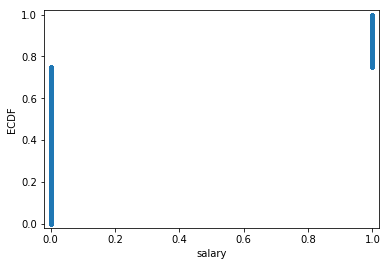

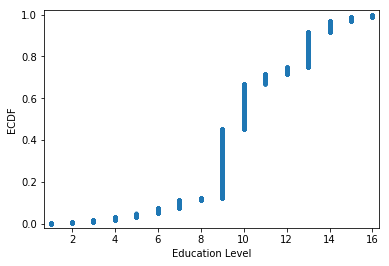

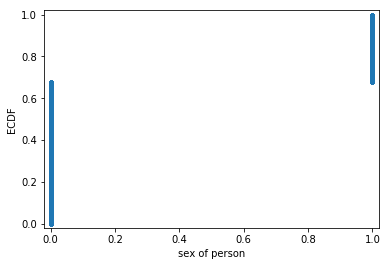

In [10]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


# Compute ECDF for salary
x, y = ecdf(df['salary'])

# Generate plot
_ = plt.plot(x, y, marker='.', linestyle='none')

# Make the margins nice
plt.margins(0.02)

# Label the axes
_ = plt.xlabel('salary')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

# Compute ECDF for educational level
x, y = ecdf(df['education_num'])

# Generate plot
_ = plt.plot(x, y, marker='.', linestyle='none')

# Make the margins nice
plt.margins(0.02)

# Label the axes
_ = plt.xlabel('Education Level')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

# Compute ECDF for Gender
x, y = ecdf(df['sex'])

# Generate plot
_ = plt.plot(x, y, marker='.', linestyle='none')

# Make the margins nice
plt.margins(0.02)

# Label the axes
_ = plt.xlabel('sex of person')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()


####  when it comes to education level, the majority is 9 which is HS-grade which might be less than 50K. 
##### about 80% of the people in the data set make less than 50k,
##### and about 65% of them are males 

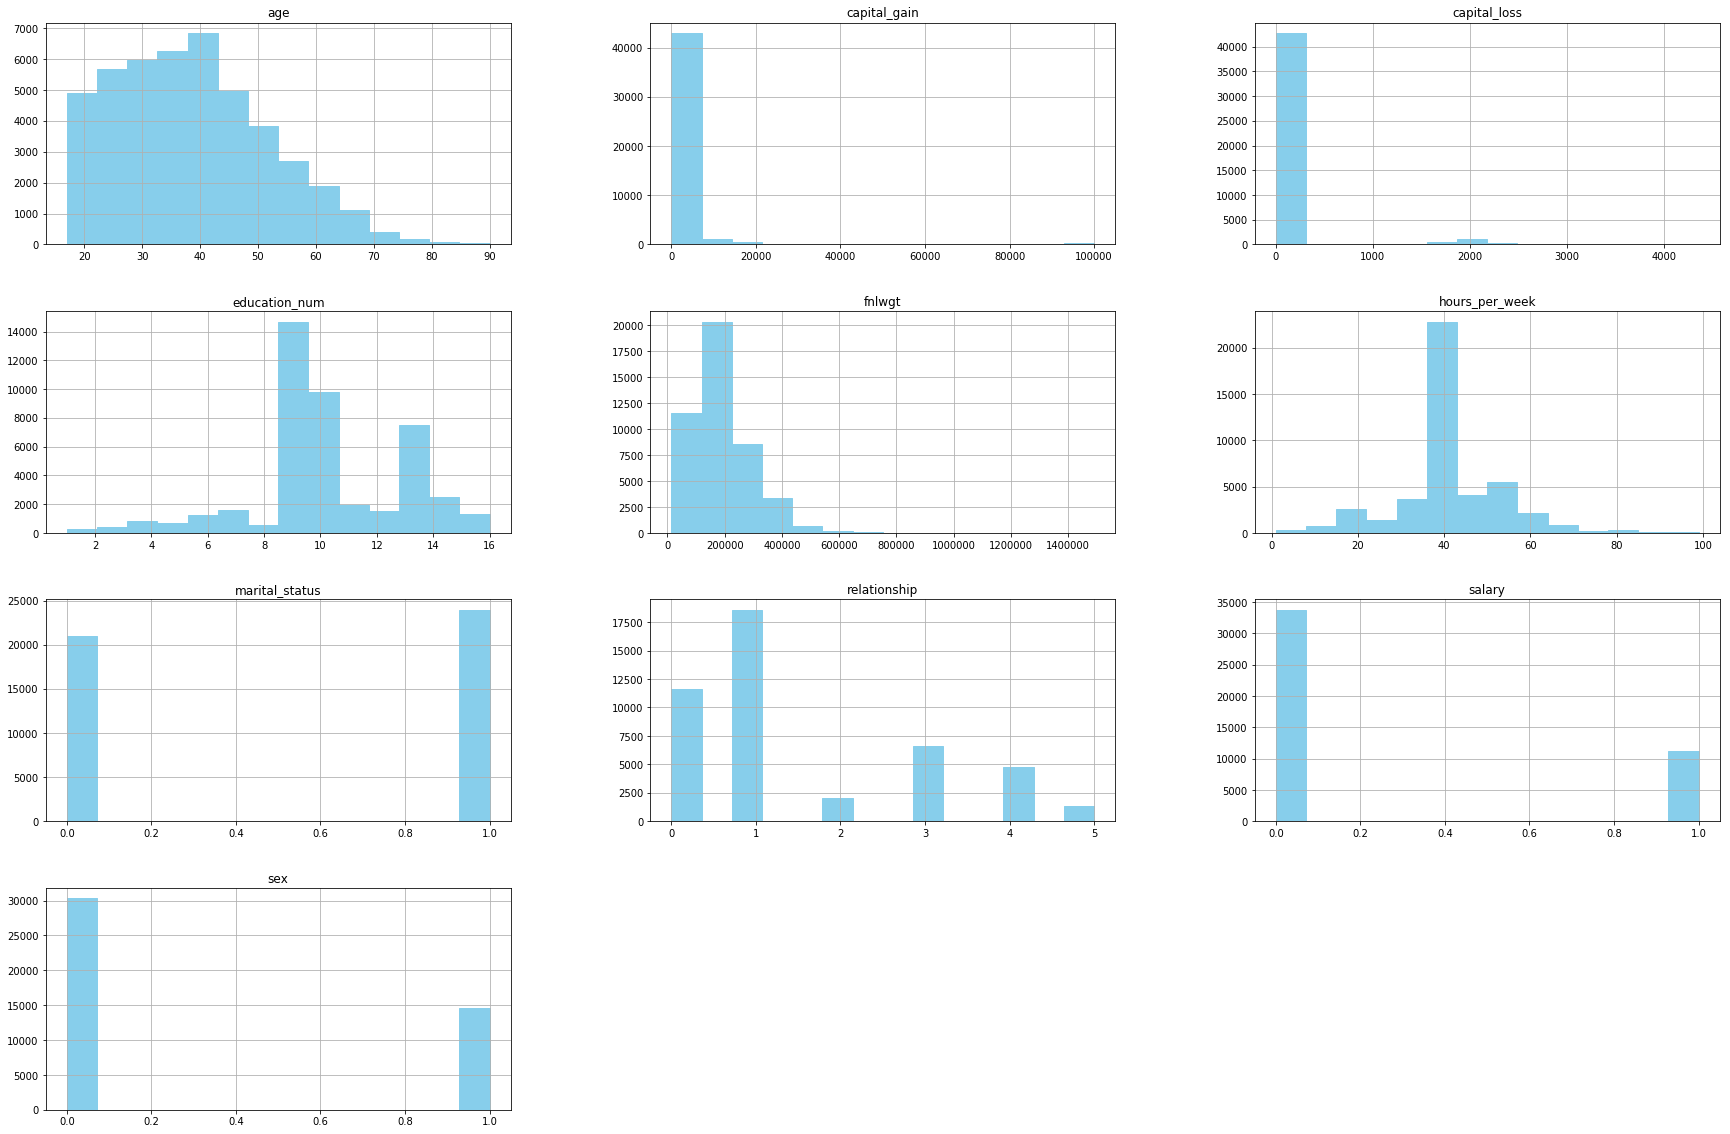

In [11]:
df.hist(bins= 14, color = "skyblue", ec="skyblue", figsize=(30,20))
plt.show()

C:\Users\Majadly\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


The skewness is 0.529901568445034


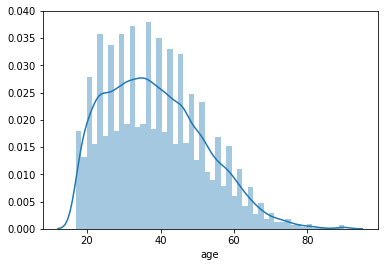

In [12]:
sns.distplot(df['age'])
print ('The skewness is {}'.format(df['age'].skew()))

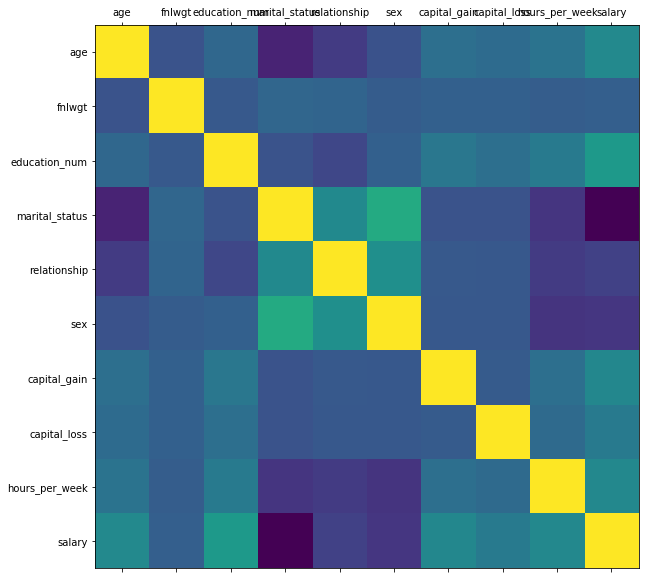

In [13]:
def plot_correlation(df):
    corr= df.corr()
    fig, ax =plt.subplots(figsize=(10,10))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)
    plt.show()

plot_correlation(df)

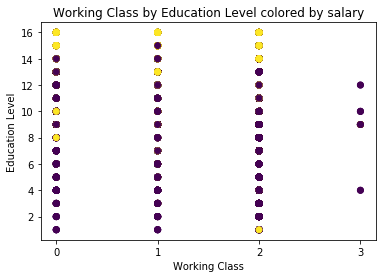

In [26]:
#fun stuff
plot = plt.scatter(df.iloc[:,1], df.iloc[:,3], c = df['salary'])
plt.title('Working Class by Education Level colored by salary')
plt.xlabel('Working Class')
plt.ylabel('Education Level')
plt.show()
plt.close()

On the graph above we can see that the higher working class you are in, and the higher education level you have, the more likely you will have a higher income
### lets see some data in relation to Salary

In [14]:
df[['relationship','salary']].groupby(['relationship']).mean()


,salary
relationship,
0,0.105141
1,0.456907
2,0.487946
3,0.015798
4,0.063569
5,0.036613


In [15]:
## df[['age','salary2']].groupby(['age']).mean()
# it shows results from age 17-90, will not be using it 

In [16]:
df[['marital_status','salary']].groupby(['marital_status']).mean()

,salary
marital_status,
0,0.455483
1,0.067804


In [17]:
df[['workclass','salary']].groupby(['workclass']).mean()

,salary
workclass,
0,0.307512
1,0.361977
2,0.218880
3,0.095238


In [18]:
df[['race','salary']].groupby('race').mean()

,salary
race,
0,0.262371
1,0.125885
2,0.283193


In [ ]:
df.drop(labels=['education','occupation'],axis=1,inplace=True)

In [20]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
#Creation of Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3, random_state=42)
assert len(X_train) + len(X_test) == len(X)

#Creation of Train and validation dataset
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=.3, random_state=42)

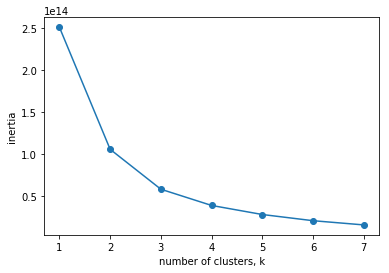

In [21]:
#Model Eval
ks = range(1, 8)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(X_train)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [22]:
#based on graph above, I am going to go with 4 cluster
knn = KNeighborsClassifier(n_neighbors = 4)

# Fit the data
knn = knn.fit(X_train, y_train)

# Predict on the data
y_prediction = knn.predict(X_test)

print ('*'*36)
print ('Accuracy score:')
print (accuracy_score(y_test,y_prediction))
print ('*'*36)
print ('Confusion Matrix:')
print (confusion_matrix(y_test,y_prediction))
print ('*'*36)
print ('Classification Matrix:')
# Classification Report of predictions
print(classification_report(y_test, y_prediction))


************************************
Accuracy score:
0.7832256147388753
************************************
Confusion Matrix:
[[9631  473]
 [2445  912]]
************************************
Classification Matrix:
             precision    recall  f1-score   support

          0       0.80      0.95      0.87     10104
          1       0.66      0.27      0.38      3357

avg / total       0.76      0.78      0.75     13461



In [23]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print ('*'*36)
print ('Accuracy score:')
print (accuracy_score(y_test,y_pred))
print ('*'*36)
print ('Confusion Matrix:')
print (confusion_matrix(y_test,y_pred))
print ('*'*36)
print ('Classification Matrix:')
print(classification_report(y_test, y_pred))


************************************
Accuracy score:
0.8071465715771488
************************************
Confusion Matrix:
[[8756 1348]
 [1248 2109]]
************************************
Classification Matrix:
             precision    recall  f1-score   support

          0       0.88      0.87      0.87     10104
          1       0.61      0.63      0.62      3357

avg / total       0.81      0.81      0.81     13461



In [24]:
# Lets see some prediction with Random Forest
randomForest = RandomForestClassifier(n_estimators=100)
randomForest.fit(X_train,y_train)
prediction = randomForest.predict(X_test)

print ('*'*36)
print ('Accuracy score:')
print (accuracy_score(y_test,prediction))
print ('*'*36)
print ('Confusion Matrix:')
print (confusion_matrix(y_test,prediction))
print ('*'*36)
print ('Classification Matrix:')
print (classification_report(y_test,prediction))

************************************
Accuracy score:
0.8471138845553822
************************************
Confusion Matrix:
[[9305  799]
 [1259 2098]]
************************************
Classification Matrix:
             precision    recall  f1-score   support

          0       0.88      0.92      0.90     10104
          1       0.72      0.62      0.67      3357

avg / total       0.84      0.85      0.84     13461



quick summary: 

I tested my data with KNN, Decision tree,, and Random forest. 
I got the following accuracy scores:

###### K-Nearest-Neighbors Accuracy score: 0.7829284599955427
###### Decision Tree Accuracy score: 0.802243518312161
###### Random Forest Accuracy score: 0.8441423371220563


The best ML algorthim with accuracy score of 84% is the random forest. Its not 1.0 like the iris data, but im still happy with the score :).

#### Precision

#### Recall

#### F1 score
The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. 
We get .84 wich is pretty good 
#### Support


In [25]:
df.head()

,age,workclass,fnlwgt,education_num,marital_status,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,0,77516,13,1,0,0,0,2174,0,40,0,0
1,50,1,83311,13,0,1,0,0,0,0,13,0,0
2,38,2,215646,9,1,0,0,0,0,0,40,0,0
3,53,2,234721,7,0,1,1,0,0,0,40,0,0
4,28,2,338409,13,0,2,1,1,0,0,40,1,0


In [27]:
# Cross Validation 
# Initialize call to ML Algorithm of choice
knn = KNeighborsClassifier(n_neighbors = 6)

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(knn, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.78785515 0.78571429 0.78627145 0.7881422  0.78780787]
Average 5-Fold CV Score: 0.7871581924430406


In [28]:

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = linear_model.LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.05179474679231213}
Best score is 0.7905458111390938


In [29]:
# X & y from above
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=.3, random_state=42)
 
# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train,y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test,y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test,y_test)))


Accuracy with Scaling: 0.8228957729737761
Accuracy without Scaling: 0.7697793626030756


In [30]:

# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, param_grid = parameters)
# Fit to the training set
cv.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))


Accuracy: 0.8457766882103855
             precision    recall  f1-score   support

          0       0.86      0.94      0.90      6748
          1       0.76      0.55      0.64      2226

avg / total       0.84      0.85      0.84      8974

Tuned Model Parameters: {'SVM__C': 1, 'SVM__gamma': 0.1}
